In [0]:
# 구글 드라이버 이용
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#필요 라이브러리 임포트
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['axes.unicode_minus'] = False
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [0]:
# 파일 불러오기 예시
# pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/train.csv')

# 4319
train_dt = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/train.csv').set_index('id')
test_dt = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/test.csv').set_index('id')

In [0]:
print(train_dt.shape)
train_dt.head(2)

(4752, 59)


,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN


### 분석 방법

1. Y00 - Y17 값을 예측 / Y18 값과 유사한 데이터만 이용
    - 유사한 데이터 평균을 구해 Y18과 연결
    - 학습시키기

In [0]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score

In [0]:
X_train = train_dt.iloc[:, :40]

X_train.head(2)

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0
1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0


In [0]:
X_train = train_dt.iloc[:4320, :40]
X_test = train_dt.iloc[4320:, :40]

In [0]:
# def func(num):
#   # -17 ~ -2 / -1 : Y18
#   print(num)

#   y_train = train_dt.iloc[:4320, 40 + num]
#   y_test = train_dt.iloc[4320:, 40 + num]

#   lgb_train = lgb.Dataset(X_train, label=y_train)

#   lgb_param = {
#       "objective":"regression",
#       "metrics":"mae",
#       "learning_rate":0.01
#   }

#   print("cv start")
#   cv_result = lgb.cv(
#       lgb_param,
#       lgb_train,
#       num_boost_round=99999,
#       nfold=5,
#       early_stopping_rounds=10,
#       stratified=False,
#       verbose_eval=10 
#   )

#   print("train start")
#   lgb_model = lgb.train(
#       lgb_param,
#       lgb_train,
#       num_boost_round=len(cv_result["l1-mean"])
#   )

#   pred = lgb_model.predict(X_test)

#   return pred

In [0]:
# main = np.array([])

# for i in range(0,18):
#   pred = func(i)
#   if i:
#     main = np.vstack([main, pred])
#   else:
#     main = np.copy(pred)
  
# main = pd.DataFrame(main)

In [0]:
# main.to_csv('/content/gdrive/My Drive/Colab Notebooks/answer.csv')

In [0]:
main = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/answer.csv')

main = main.iloc[:, 1:].T

main.shape

(432, 18)

In [0]:
Y = train_dt.iloc[4320:,-1]

Y.index = main.index

In [0]:
result = pd.concat([main, Y], axis = 1)

list_corr = result.corr().tail(1).T

In [0]:
list_mse = []
list_mean = []
for i in range(18):
  tmp = (result[i] - result['Y18'])
  list_mse.append([(tmp**2).sum()])
  list_mean.append([tmp.mean()])

pd.concat([pd.DataFrame(list_mse), pd.DataFrame(list_mean), list_corr], axis = 1)

,0,0,Y18
0,13575.717918,-3.041890,0.712467
1,5941.282800,0.623150,0.829174
2,5625.742651,0.494977,0.832368
3,14312.847654,-0.726485,0.428286
4,14449.095241,-0.603510,0.407004
5,10048.345054,1.279566,0.791205
6,3997.712553,-1.839526,0.932232
7,3788.741591,-1.463564,0.912251
8,13390.365867,1.707048,0.794422
9,3697.174401,-0.385231,0.913202


## 분석 경우의 수
1. 상관 계수 0.9이상인 변수 평균
2. mse 값이 낮은 변수 5개(4000이하)
3. 상관 계수 0.9 이상인 변수에서 평균 값을 더해 줘 mse값이 낮은 변수 선택


6,7,9,12,16

In [0]:
def func(data):
  return data.mean()

result_mse = {}
lst = [6,7,9,12,16]

for a in lst:
  for b in lst:
    for c in lst:
      for d in lst:
        result = 0
        main.result = main[[a,b,c,d]].apply(func, axis = 1)
        
        for i in range(len(main)):
          result += (main.result[i] - Y_18[i])**2

        result_mse[str(a) + '_' + str(b) + '_'+str(c)+'_'+str(d)] = result

result_mse

In [0]:
pd.Series(result_mse).sort_values()

16_16_12_12    2459.862921
12_16_12_16    2459.862921
12_12_16_16    2459.862921
16_12_12_16    2459.862921
16_12_16_12    2459.862921
                  ...     
7_6_6_6        3828.184858
6_7_6_6        3828.184858
6_6_6_7        3828.184858
6_6_7_6        3828.184858
6_6_6_6        3997.712553
Length: 625, dtype: float64

In [0]:
def func(data):
  return data.mean()
main.result = main[[12,16]].apply(func, axis = 1)

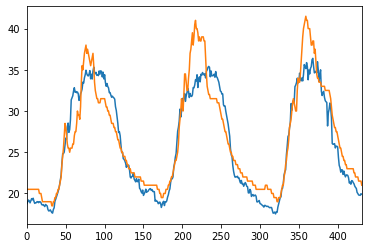

In [0]:
main.result.plot()
Y_18.plot()

In [0]:
main.result.to_csv('/content/gdrive/My Drive/Colab Notebooks/Y_18_original.csv')

In [0]:
main.result.apply(lambda x : (int(x*2))/2).to_csv('/content/gdrive/My Drive/Colab Notebooks/Y_18_rounds.csv')